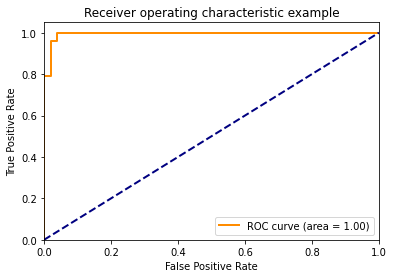

In [13]:
import numpy as  np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data   # (150, 4)
y = iris.target # (150,)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])    #(150, 3)
n_classes = y.shape[1]

# Add noisy features to make the problem harder
# random_state = np.random.RandomState(0)
# n_samples, n_features = X.shape
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import time
import os
import torch.backends.cudnn as cudnn

os.environ["CUDA_VISIBLE_DEVICES"] = '0'
start_time = time.time()
batch_size = 128
learning_rate = 0.1

transform_train = transforms.Compose([
    # transforms.Resize((224,224)),
    transforms.RandomCrop(32, padding = 4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4914, 0.4824, 0.4467),
                          std=(0.2471, 0.2436, 0.2616))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4914, 0.4824, 0.4467),
                          std=(0.2471, 0.2436, 0.2616))
])


train_dataset = datasets.CIFAR100(root='/home/ljj0512/private/project/data',
                                 train=True,
                                 transform=transform_train,
                                 download=True)

test_dataset = datasets.CIFAR100(root='/home/ljj0512/private/project/data',
                                train=False,
                                transform=transform_test,
                                download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=2)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=2)

import torch
import torch.nn as nn
import sklearn.metrics as metric
import resnet as RN

model = RN.ResNet('cifar100', 50, 100, 224, True)
model  = nn.DataParallel(model).cuda()
checkpoint = torch.load('/home/ljj0512/private/project/log/2022-08-21 09:23:52/checkpoint.pth.tar')
model.load_state_dict(checkpoint['state_dict'])
model.eval()

for i, (input, target) in enumerate(test_loader):
    target = target.cuda()
    output = model(input)
    result = torch.
# print(checkpoint['state_dict'])

In [14]:
import torch
import torch.nn as nn
import resnet as RN

model = RN.ResNet('cifar100', 50, 100, 224, True)
# print(len(model.state_dict()))
# print(model.state_dict())
model = nn.DataParallel(model)
print(len(model.state_dict()))
print(model.state_dict())

320
OrderedDict([('module.conv1.weight', tensor([[[[ 4.0639e-02,  6.5243e-03,  1.4162e-02,  ..., -2.6584e-02,
           -7.0348e-03,  1.1394e-02],
          [ 1.7461e-02, -8.6558e-03,  6.9075e-03,  ...,  2.7018e-02,
           -7.9127e-03, -4.1856e-02],
          [-1.4863e-02,  2.4860e-02,  7.8175e-03,  ..., -2.0913e-02,
            4.0827e-02,  1.7330e-02],
          ...,
          [ 1.3882e-02,  1.7173e-02,  1.8235e-02,  ..., -1.1569e-02,
           -1.5172e-02, -1.5889e-02],
          [-2.4539e-02,  1.1405e-03,  4.0911e-03,  ...,  4.4080e-03,
           -2.6856e-02,  1.1070e-02],
          [ 1.5937e-02,  2.6323e-02, -8.6309e-02,  ...,  2.5407e-02,
           -2.7062e-03, -2.2436e-02]],

         [[ 1.1515e-02, -5.7095e-02,  1.7469e-02,  ..., -1.9394e-02,
           -4.7030e-02,  1.2497e-02],
          [ 1.9489e-02,  1.1736e-02, -2.2706e-02,  ..., -2.4110e-02,
           -5.6075e-04,  2.6003e-03],
          [-1.2028e-02,  1.7316e-02, -1.2007e-03,  ...,  2.4639e-02,
           -3.773

In [12]:
import torch
import torch.nn as nn
import resnet as RN

checkpoint = torch.load('/home/ljj0512/private/project/log/2022-08-20 10:15:06/checkpoint.pth.tar')
# print(len(checkpoint['state_dict']))
# print(checkpoint['state_dict'])

model = RN.ResNet('cifar100', 50, 100, 224, True)
model = nn.DataParallel(model)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [2]:
import resnet as rn
model = rn.ResNet('imagenet', 50, 100, 224, True)
print('the number of model parameters: {:,}'.format(sum([p.data.nelement() for p in model.parameters()])))

the number of model parameters: 23,712,932


In [3]:
import torch
import torch.nn as nn
checkpoint = torch.load('/home/ljj0512/private/project/log/2022-08-18 12:34:13/checkpoint.pth.tar')
print(len(checkpoint))
# print(checkpoint['state_dict'])

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [5]:
checkpoint = torch.load('/home/ljj0512/private/project/runs/TEST/model_best.pth.tar')
print(checkpoint)

{'epoch': 4, 'arch': 'resnet', 'state_dict': OrderedDict([('module.conv1.weight', tensor([[[[ 4.5894e-01,  8.3087e-01, -1.6438e-01],
          [ 2.1605e-01,  6.2255e-01, -1.3948e-01],
          [ 3.2328e-01,  7.7285e-01,  6.7401e-03]],

         [[ 5.4196e-01,  7.4512e-01, -1.9233e-01],
          [ 9.0118e-02,  5.2015e-01, -2.6280e-01],
          [ 1.2329e-01,  6.7732e-01, -2.6546e-01]],

         [[ 4.4833e-01,  9.0507e-01, -1.4540e-01],
          [ 3.2399e-01,  8.0667e-01, -3.8105e-01],
          [ 2.8066e-01,  9.1202e-01, -3.1960e-01]]],


        [[[-1.6429e-01, -6.8340e-01,  1.3429e-01],
          [-2.0624e-01, -1.2465e+00, -1.0094e-01],
          [-1.8602e-01, -7.3050e-01,  7.3750e-02]],

         [[ 6.8922e-01,  4.1203e-01,  1.1231e+00],
          [ 5.6991e-01, -3.6592e-01,  8.7651e-01],
          [ 2.3089e-01, -3.1628e-01,  7.0210e-01]],

         [[ 5.1784e-01, -2.7003e-01,  4.2565e-01],
          [ 1.3248e-01, -1.1624e+00, -1.0012e-02],
          [-1.5980e-02, -1.3188e+00, -3